The measured and model response matrices are defined by

$$\begin{pmatrix} x \\ y \end{pmatrix} = M_{meas,model} \begin{pmatrix} \theta_x \\ \theta_y \end{pmatrix}$$
where $\theta_x$and $\theta_y$  are the changes in steering magnet strengths,
and x , y are the resulting orbit perturbations.

The parameters in the used model is varied by LOCO to minimize the $ \chi^2 $ deviation between the model
and measured orbit response matrices $M_{model}$ and $M_{measured}$
$$  \chi^2 = \sum_{i,j} \frac{(M_{model,i,j}-M_{measured,i,j})^2}{\sigma^2_{i}} = \sum_{i,j} E_{k=(i,j)}^2 $$

The $\chi^2$ minimization is achieved by iteratively solving the linear equation
$$E_{k}^{new}= E_k +\frac{\partial{E_k}}{\partial{k_l}} \Delta k_l =0$$
$$-E_k= \frac{\partial{E_k}}{\partial{k_l}} \Delta k_l$$


In [1]:
print(f"LOCO, AT version")
from at import *
from pylab import *
from at_modules import *
from at.load import load_mat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from random import random

LOCO, AT version


In [2]:
# The lattice

from lattice import *
ring=at.Lattice(ring1, energy=1)
ring.radiation_off()

preparing twiss ..
Tunes=[0.35830786 0.36002871]
Chrom=[-2.65974451 -1.92722258]


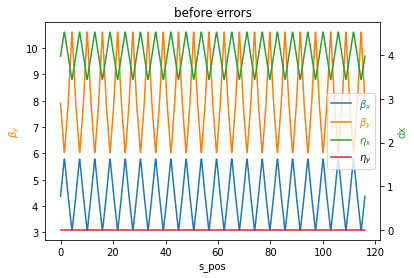

In [3]:
twiss = getOptics(ring, '*' )
make_plot(twiss, 'before errors')

(40, 40)


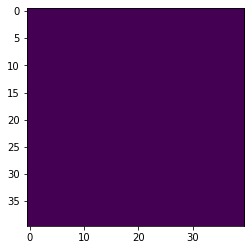

In [4]:
Cxx, Cxy= ORM_x(1.e-4, ring)
Cyy, Cyx= ORM_y(1.e-4, ring)

print(shape(Cxx))

plotORM(Cxy)

In [5]:
C0x, C0y, C0xy, C0yx, dCx, dCy, dCxy,dCyx  = generatingQuadsResponse(ring, Cxx, Cyy,Cxy, Cyx )

Done...
generating response to QF, n=19
generating response to QD, n=19
loading response to: QF
loading response to: QD


simulating perturbed machine...
Done...
preparing twiss ..
Tunes=[0.41822823 0.29747864]
Chrom=[-2.71881333 -1.93659379]


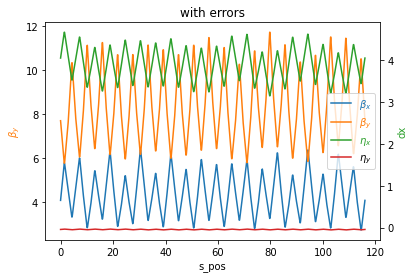

In [6]:
## simulate_errors

errorQF = 72.e-3
errorQD = 52.e-3
tiltQF = 3.e-3
tiltQD = 3.e-3

quads_info_error = simulateError_tilt(ring,errorQF,errorQD,tiltQF ,tiltQD)
twiss_error = getOptics(ring, '*')
make_plot(twiss_error, 'with errors')

(40, 40)


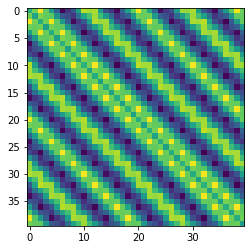

In [7]:
# ORM Cx, Cy

Cxx_err, Cxy_err= ORM_x_error(1.e-4, ring)
Cyy_err, Cyx_err= ORM_y_error(1.e-4, ring)

print(shape(Cxx_err))

plotORM(Cxx_err)

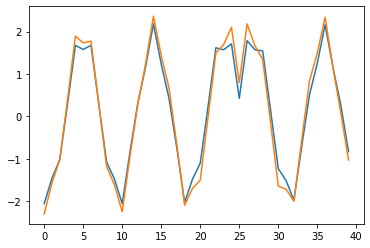

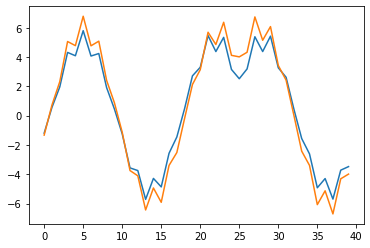

In [8]:
plt.plot(Cxx_err[25])
plt.plot((Cxx[25]))
plt.show()


plt.plot(Cyy[25])
plt.plot((Cyy_err[25]))
plt.show()

In [9]:
A, B = defineMatrices(40, C0x, C0y, C0xy, C0yx, Cxx_err, Cyy_err, Cxy_err, Cyx_err, dCx, dCy, dCxy,dCyx )

NK: 40
Nm: 40


number of singular values 40
A(160, 40) B(160, 1) U(160, 160) smat(160, 40) v(40, 40)


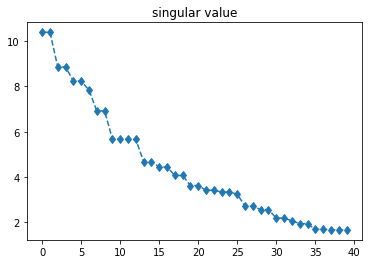

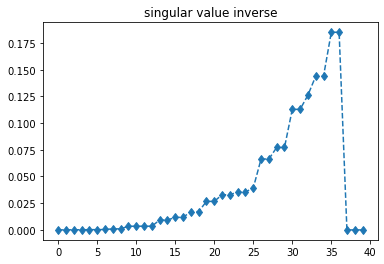

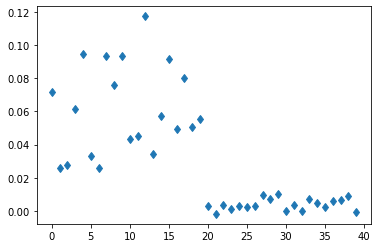

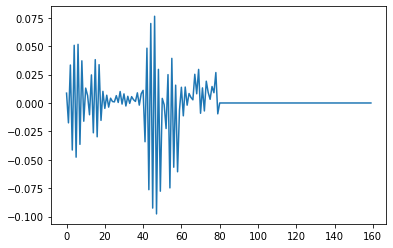

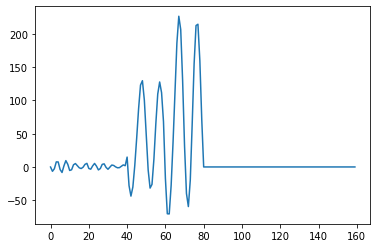

In [10]:
dk = len(dCx)
cut = 37
Ai, r, e = getInverse(A, B,dk, cut)

In [12]:
n_list = len(quads_info_error.s_pos)
quads_info = quad_info(ring)
quad_dict, quad_vals = getQuadFamilies(quads_info)
quads = [k for k in quad_dict.keys()]
quad_names = quads
setCorrection(ring, quads_info_error,quad_names, r , quads_info, n_list)

Done...
define correction : Done
set correction : Done


In [13]:
twiss_corrected = getOptics(ring, '*')

preparing twiss ..
Tunes=[0.35971171 0.36350118]
Chrom=[-2.6652194  -1.93114238]


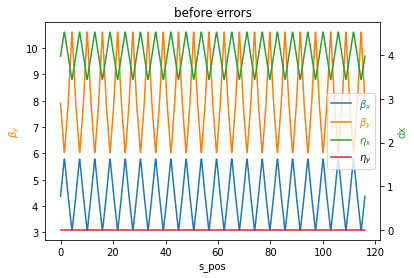

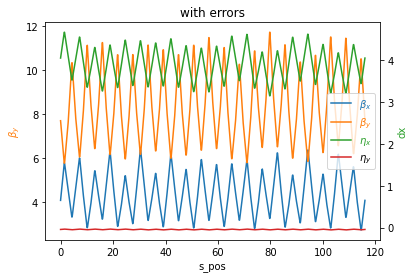

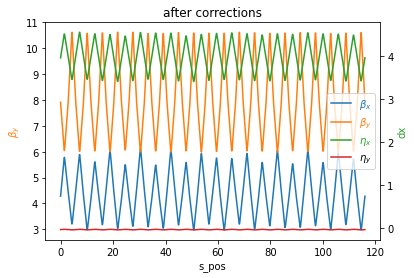

In [14]:
make_plot(twiss, 'before errors')
make_plot(twiss_error, 'with errors')
make_plot(twiss_corrected, 'after corrections')

In [15]:
getBetaBeat(twiss, twiss_error)
getBetaBeat(twiss, twiss_corrected)

getBetaBeat bx and by: 
Simulated beta beat, x:6.365973505094631%   y: 3.90126863901875%
getBetaBeat bx and by: 
Simulated beta beat, x:3.1696661410448503%   y: 0.28137343437788875%
